# Comparing Algorithms 1

In [1]:
from math import factorial, exp
import numpy as np

def exp_taylor(x,max_iter=25):
    y = 0.0
    hist = []
    for i in range(max_iter):
        y += x**i/factorial(i)
        hist.append(y)
        
    return y,np.array(hist)


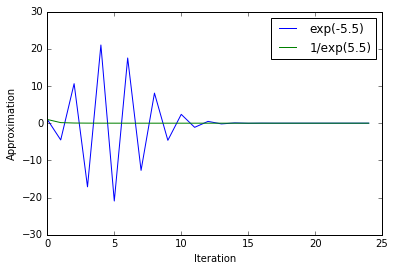

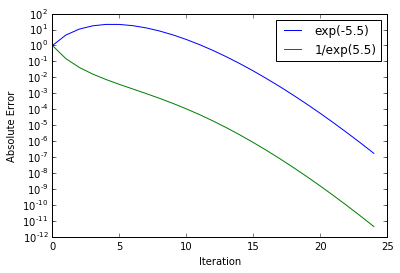

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

x = -5.5
max_iter = 25

y1,hist1 = exp_taylor(x,max_iter=max_iter)
y2,hist2 = exp_taylor(-x,max_iter=max_iter)
y2,hist2 = 1.0/y2, 1.0/hist2

plt.plot(range(max_iter),hist1,label="exp(-5.5)")
plt.plot(range(max_iter),hist2,label="1/exp(5.5)")
plt.legend()
plt.ylabel("Approximation")
plt.xlabel("Iteration")
plt.show()

plt.semilogy(range(max_iter),np.abs(hist1-exp(x)),label="exp(-5.5)")
plt.semilogy(range(max_iter),np.abs(hist2-exp(x)),label="1/exp(5.5)")
plt.legend()
plt.ylabel("Absolute Error")
plt.xlabel("Iteration")
plt.show()

# Comparing Algorithms 2

In [4]:
import numpy as np

# Bit-by-bit for calculating square root
def sqrt_bbb(x,max_iter=1000):
    base = 1.0
    y = 0.0
    hist = []
    for i in range(max_iter):
        if (y+base)**2 <= x:
            y += base
            
        hist.append(y)
        base /= 2
    return y, np.array(hist)

def sqrt_newton(x,max_iter=1000,y0=1.0):
    y = y0
    hist = []
    for i in range(max_iter):
#         print(x,y)
        y = y*(3.0 - x*y**2)/2.0
        hist.append(x*y)
        
    return x*y, np.array(hist)


x = 0.309607


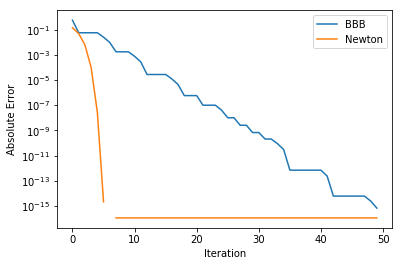

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

max_iter = 50
x = np.random.rand()
print("x = %g"%x)

y_bbb,hist_bbb = sqrt_bbb(x,max_iter=max_iter)
y_newton,hist_newtom = sqrt_newton(x,max_iter=max_iter)
# print(hist_bbb.shape,hist_newtom.shape)

plt.semilogy(range(max_iter),np.abs(hist_bbb-np.sqrt(x)),label="BBB")
plt.semilogy(range(max_iter),np.abs(hist_newtom-np.sqrt(x)),label="Newton")
plt.legend()
plt.ylabel("Absolute Error")
plt.xlabel("Iteration")
plt.show()

# Stability

In [7]:
x = 1.5
y,hist = sqrt_newton(x,max_iter=max_iter,y0=1.0)

# Speed of Special Functions

In [8]:
import time
from math import log
import numpy as np

x = np.random.rand()
y = np.random.rand()

print("x = %g"%x)
print("y = %g"%y)

b = time.time()
for i in range(50000000):
    z = x+y
print("Addition:", time.time() - b)

b = time.time()
for i in range(50000000):
    z = x*y
print("Multiplication:", time.time() - b)

b = time.time()
for i in range(50000000):
    z = x/y
print("Division:", time.time() - b)

b = time.time()
for i in range(50000000):
    z = log(x)
print("Log:", time.time() - b)

x = 0.460017
y = 0.704172
Addition: 5.80141282081604
Multiplication: 6.139509677886963
Division: 6.255326986312866
Log: 13.184090852737427


In [1]:
1000000000.0

1000000000.0

In [2]:
1e9

1000000000.0